# EV Market


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import os
import warnings

In [2]:
df=pd.read_csv("/kaggle/input/ev-india-market/ElectricCarData_Clean_Me.csv")


In [3]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,4540988.068
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,2455473.000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,4619563.204
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,5569012.764
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,2700774.753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000,3683209.500
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050,7861606.055
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000,4092455.000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000,5320191.500


In [4]:
# finding null values in the dataset
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
INR                 0
dtype: int64

In [5]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro',
       'INR'],
      dtype='object')

### Distributing vehicle price above and below INR 4000000

In [6]:
df['CarName'] = df['Brand'] + '-' + df['Model']
df_1= df.loc[df['INR'] <=4000000]
df_2 = df.loc[df['INR'] >4000000]
t1 = ['Less than INR 4000000']
t2 = ['More thanINR 4000000']

### Count plot for PowerTrain

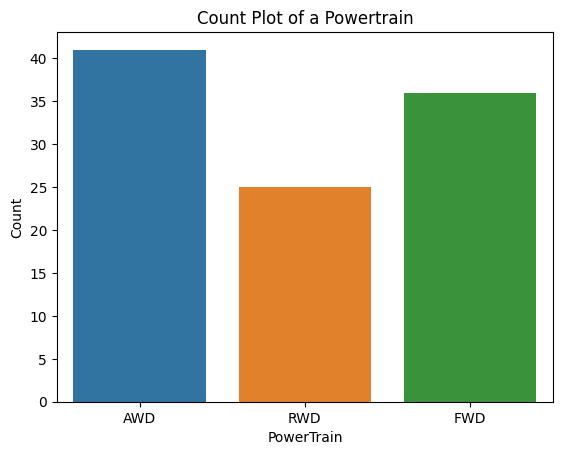

In [7]:
def train(dataframe):
    sbn.countplot(x=dataframe['PowerTrain'])
    plt.title('Count Plot of a Powertrain')
    plt.xlabel('PowerTrain')
    plt.ylabel('Count')
    
train(df)

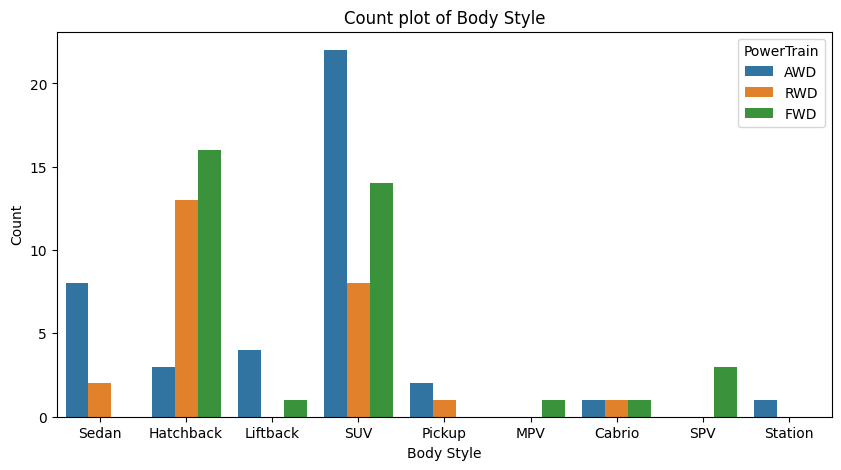

In [8]:
def bodystyle(dataframe):
    plt.figure(figsize=(10,5))
    sbn.countplot(x='BodyStyle', data=dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style')
    plt.xlabel('Body Style')
    plt.ylabel('Count')
    plt.show()
    
bodystyle(df)

### Range of Vehicles

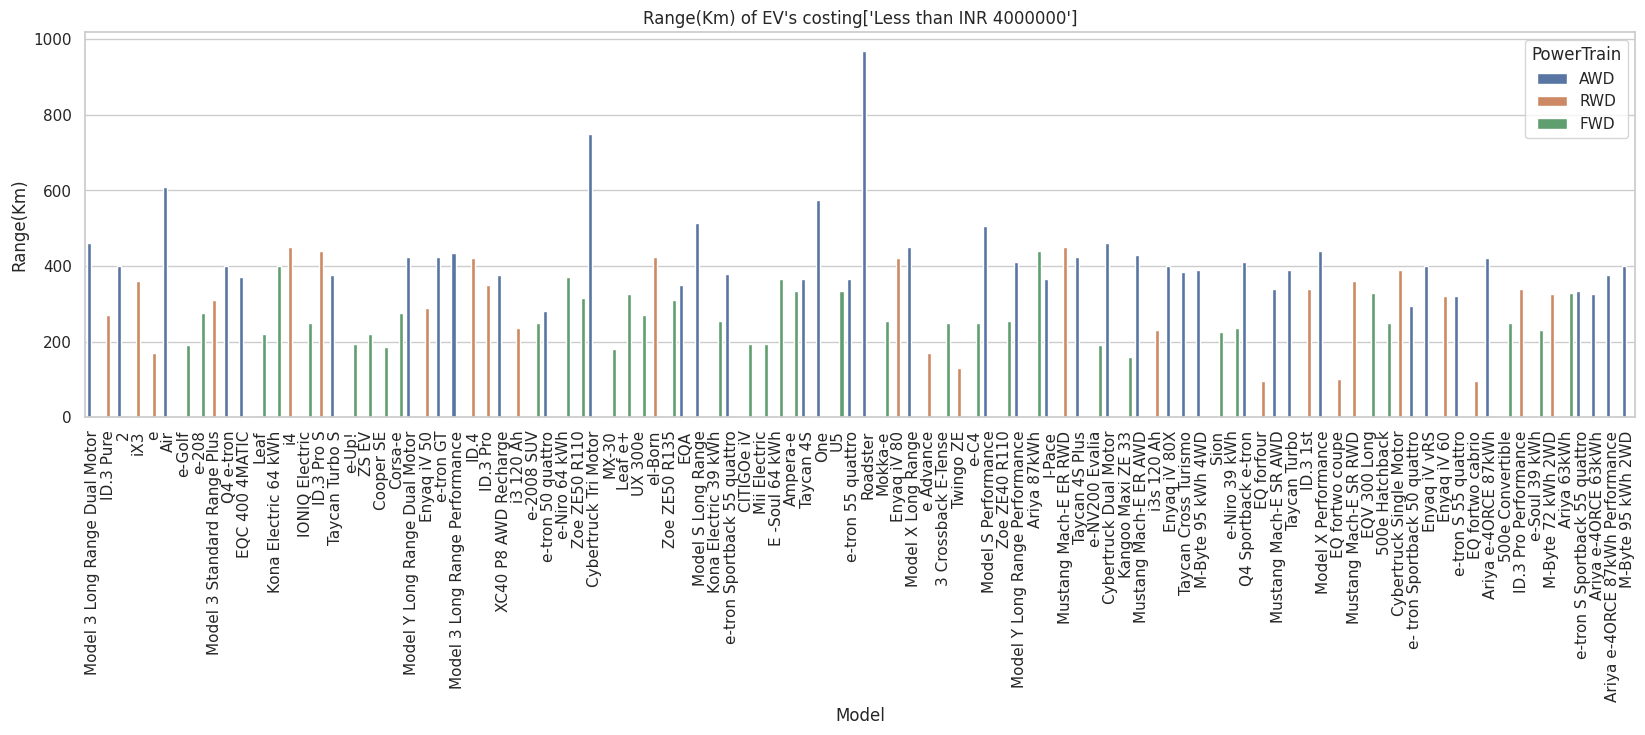

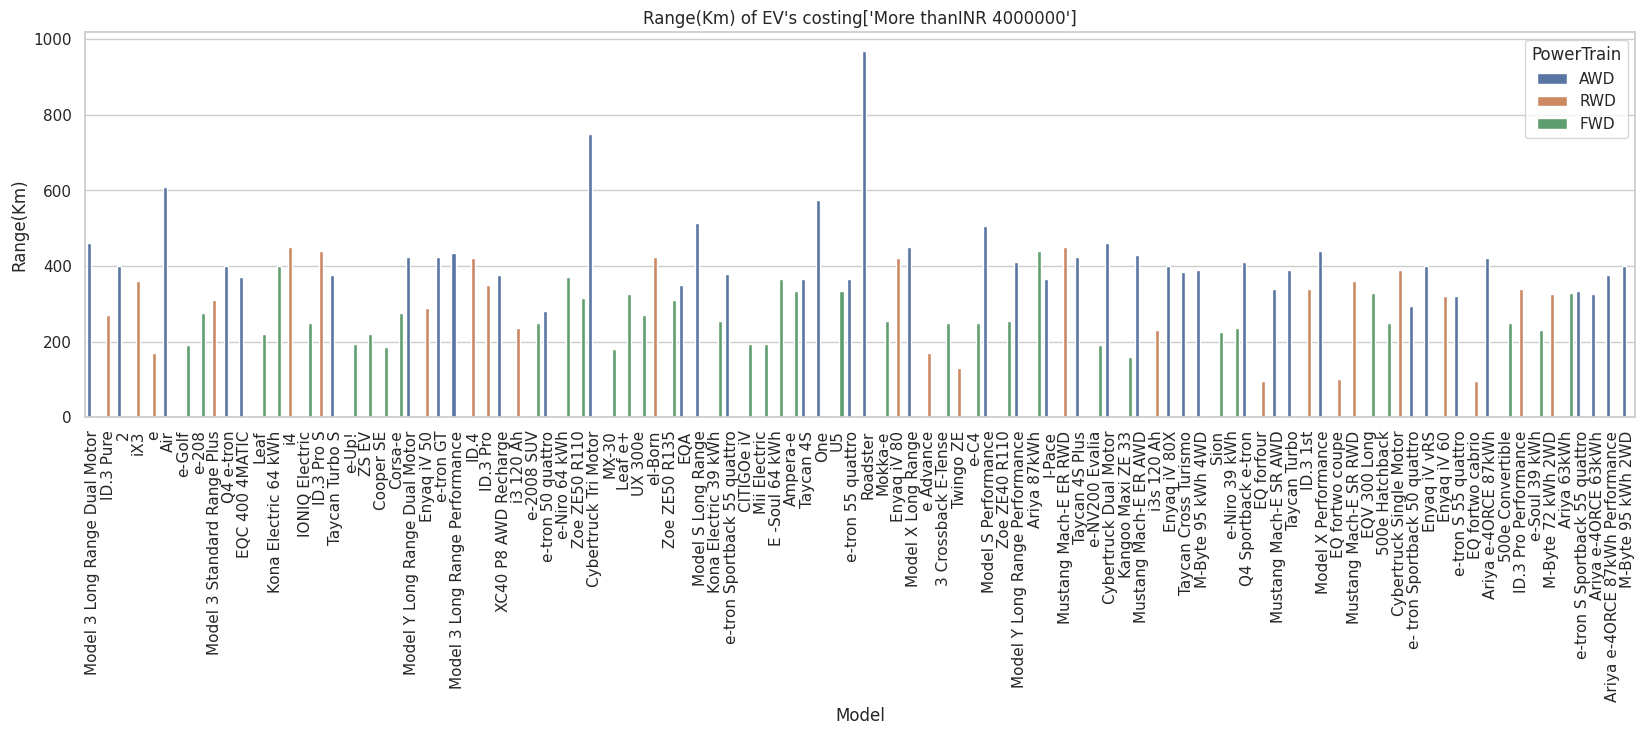

In [9]:
def range(dataframe, price):
    plt.figure(figsize=(20,5))
    sbn.set_theme(style="whitegrid")
    sbn.barplot(x = 'Model', y = 'Range_Km', data=df, hue=df['PowerTrain'])
    plt.title('''Range(Km) of EV's costing{}'''.format(price))
    plt.ylabel('Range(Km)')
    plt.xlabel('Model')
    plt.xticks(rotation = 90)
    plt.show()

range(df_1, t1)
range(df_2, t2)
    

### Range - Battery Pack

/tmp/ipykernel_33/251817763.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')


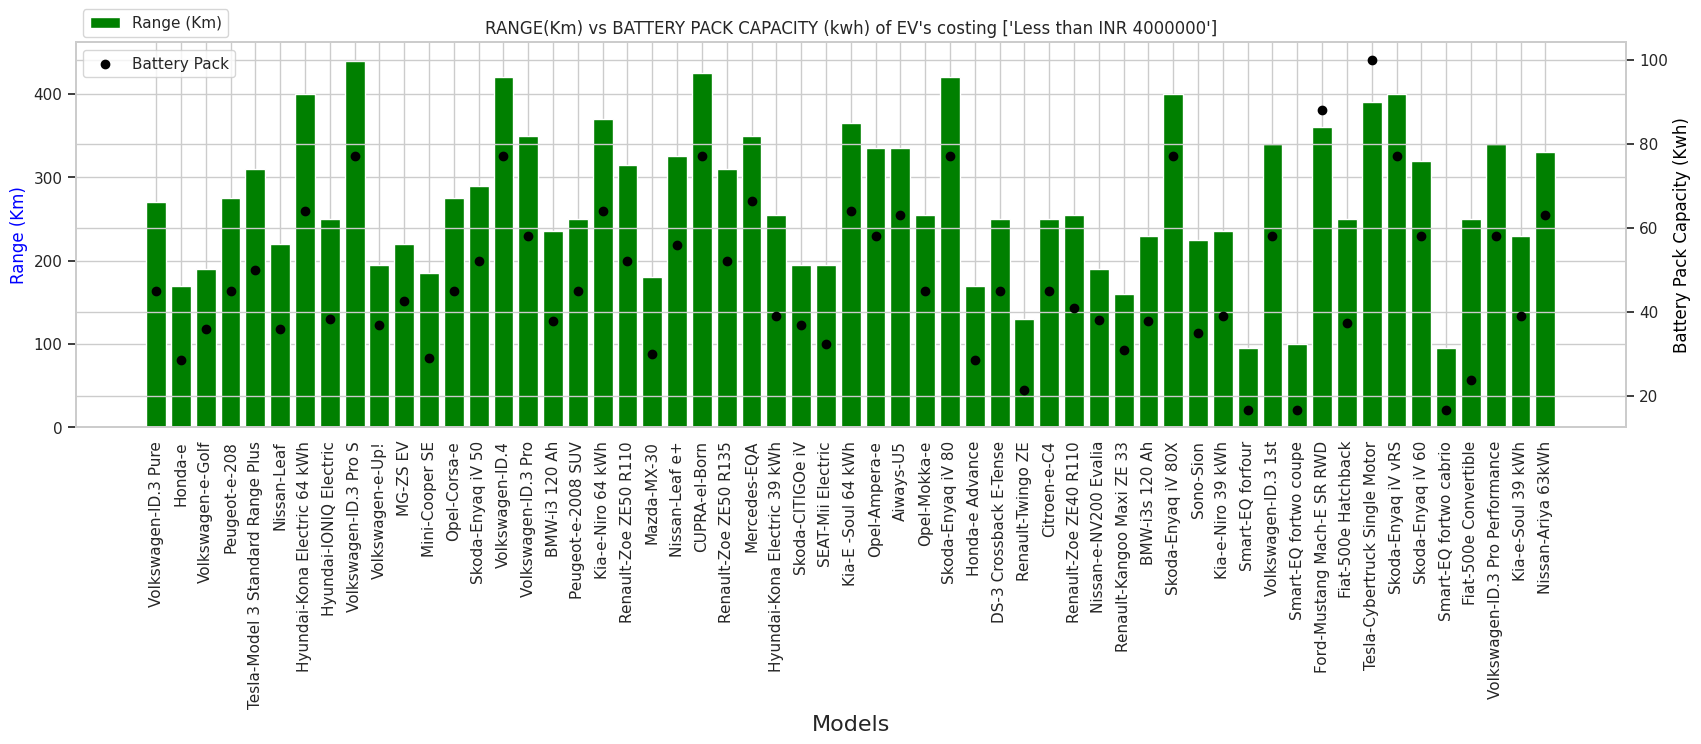

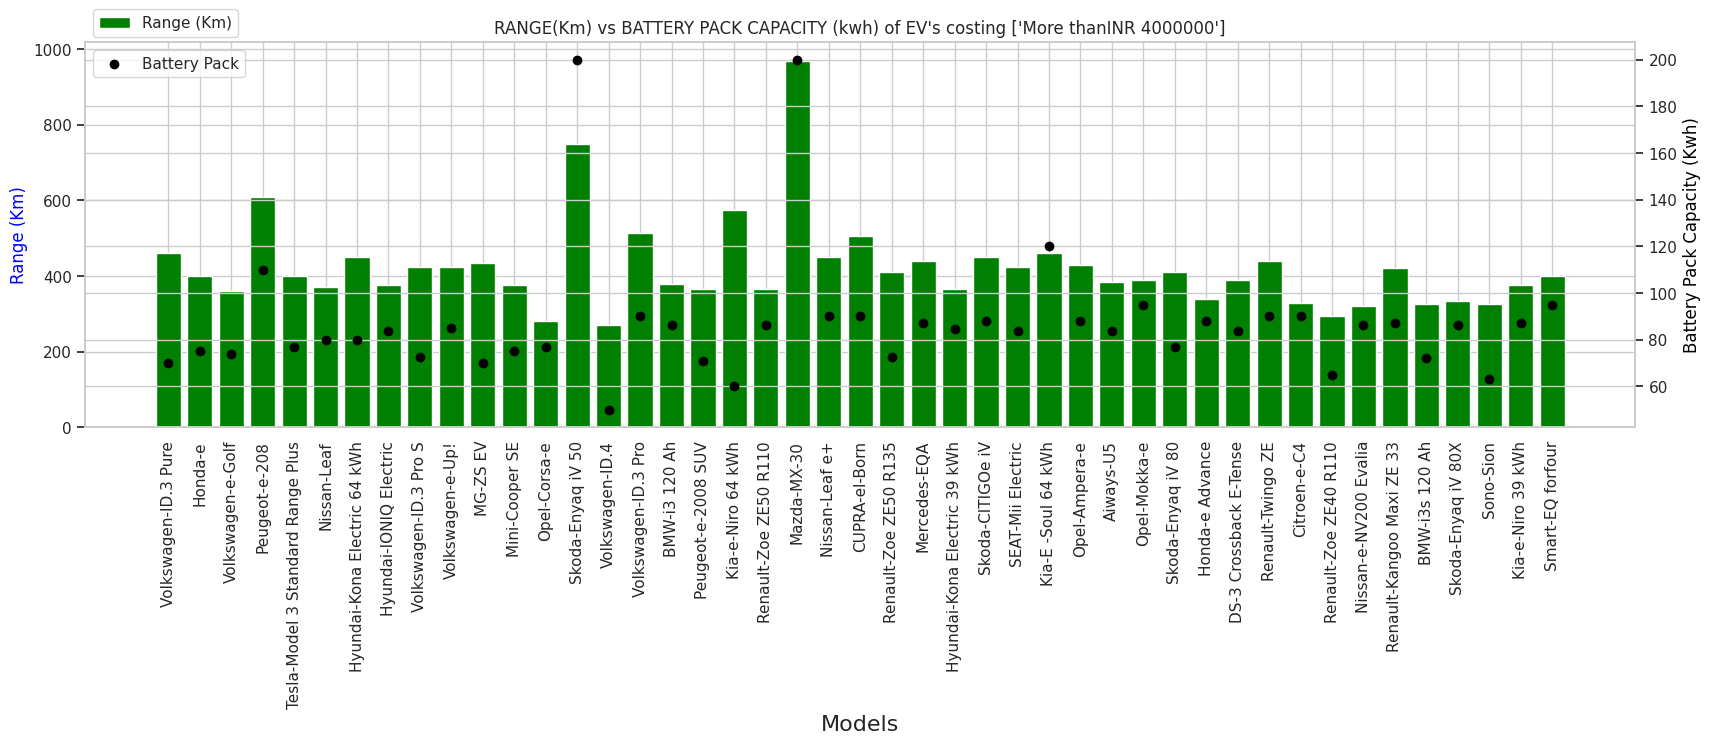

In [10]:
#range-batterypack
def range_batterypack(dataframe, text):
    fig = plt.figure(figsize=(20,5))
    a1= plt.subplot()
    a1.bar(dataframe["CarName"], dataframe["Range_Km"], label='Range (Km)', color='green')
    plt.legend(loc= "upper left", bbox_to_anchor=(0,1.105))
    a2 = a1.twinx()
    a2.scatter(dataframe["CarName"], dataframe["Battery_Pack Kwh"], label= "Battery Pack", color= 'black')
    plt.title('''RANGE(Km) vs BATTERY PACK CAPACITY (kwh) of EV's costing {}'''.format(text), fontsize=12)
    a1.set_xlabel('Models', size= 16)
    a1.set_ylabel('Range (Km)', color = 'blue')
    a2.set_ylabel('Battery Pack Capacity (Kwh)', color='black')
    plt.legend(loc='upper left', bbox_to_anchor=(0,1))
    a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')
    plt.show()
    
range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

### Range - Vehicle Price

/tmp/ipykernel_33/4025405043.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')


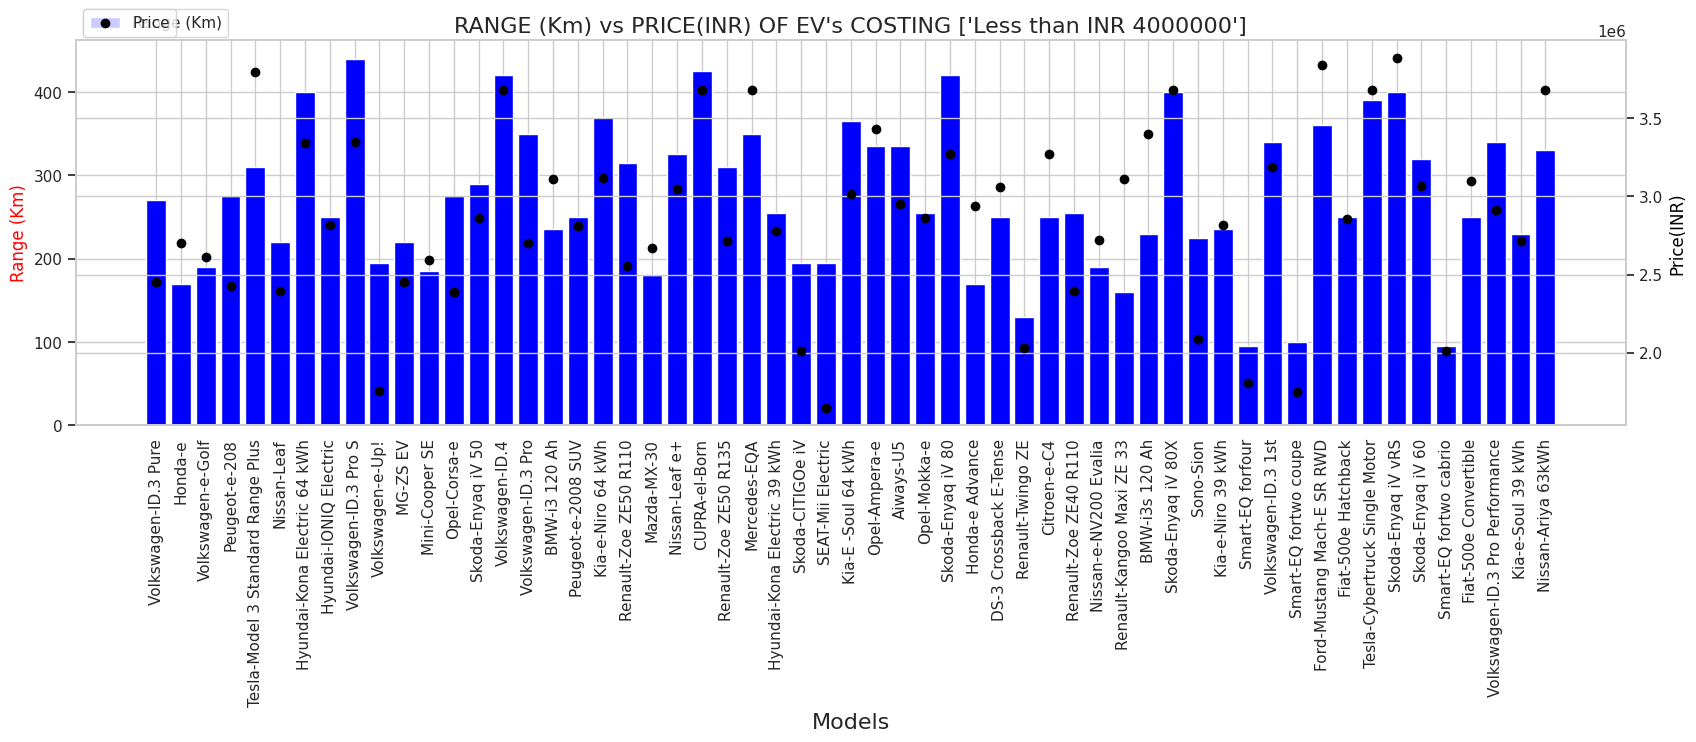

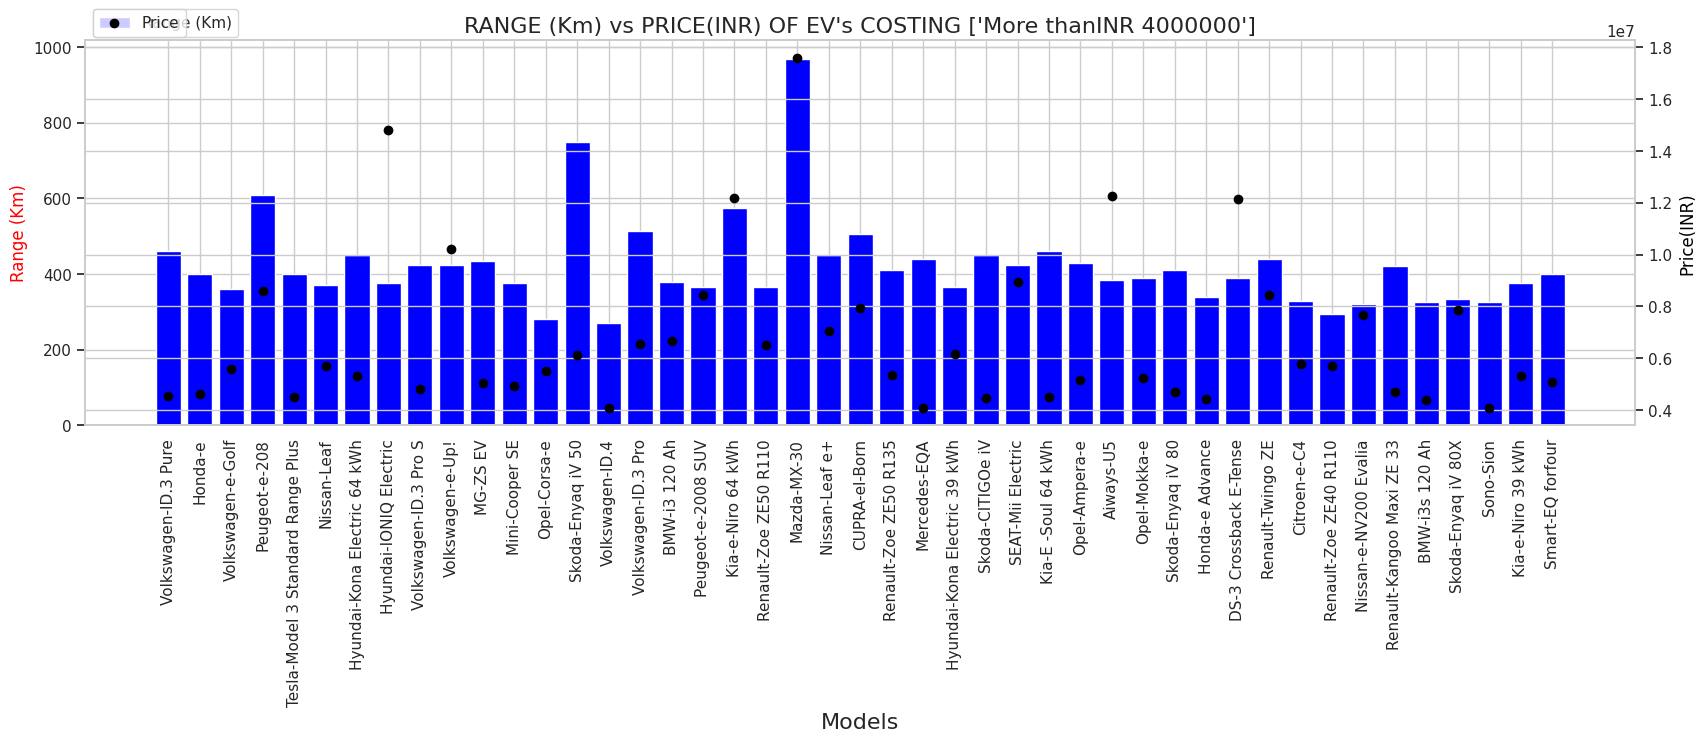

In [11]:
#Range - Price
def range_price(dataframe, text):
    fig = plt.figure(figsize=(20, 5))
    a1 = plt.subplot()
    a1.bar(dataframe['CarName'], dataframe['Range_Km'], label='Range (Km)', color='blue')
    plt.legend(loc='upper left', bbox_to_anchor = (0, 1.1))
    a2= a1.twinx()
    a2.scatter(dataframe['CarName'], dataframe['INR'], label = 'Price', color = 'black')
    plt.title('''RANGE (Km) vs PRICE(INR) OF EV's COSTING {}'''.format(text), fontsize=16)
    a1.set_xlabel('Models', size=16)
    a1.set_ylabel('Range (Km)', color = 'red')
    a2.set_ylabel('Price(INR)', color= 'black')
    plt.legend(loc = 'upper left', bbox_to_anchor = (0,1.1))
    a1.set_xticklabels(df_1['CarName'], rotation = 'vertical')
    plt.show()
    
range_price(df_1, t1)
range_price(df_2, t2)

### Acceleration(0-100km/hr)

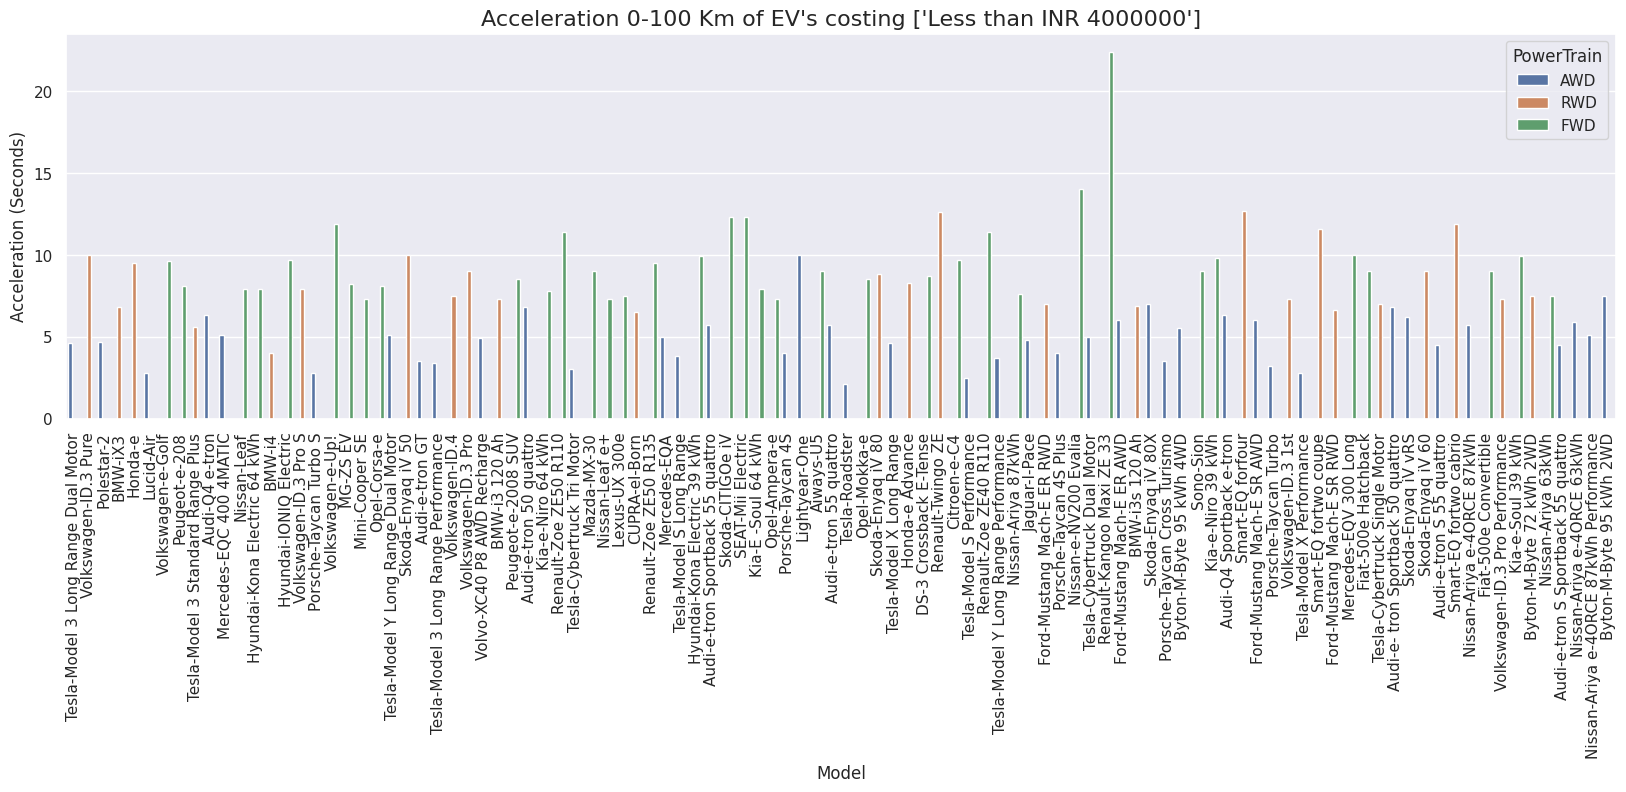

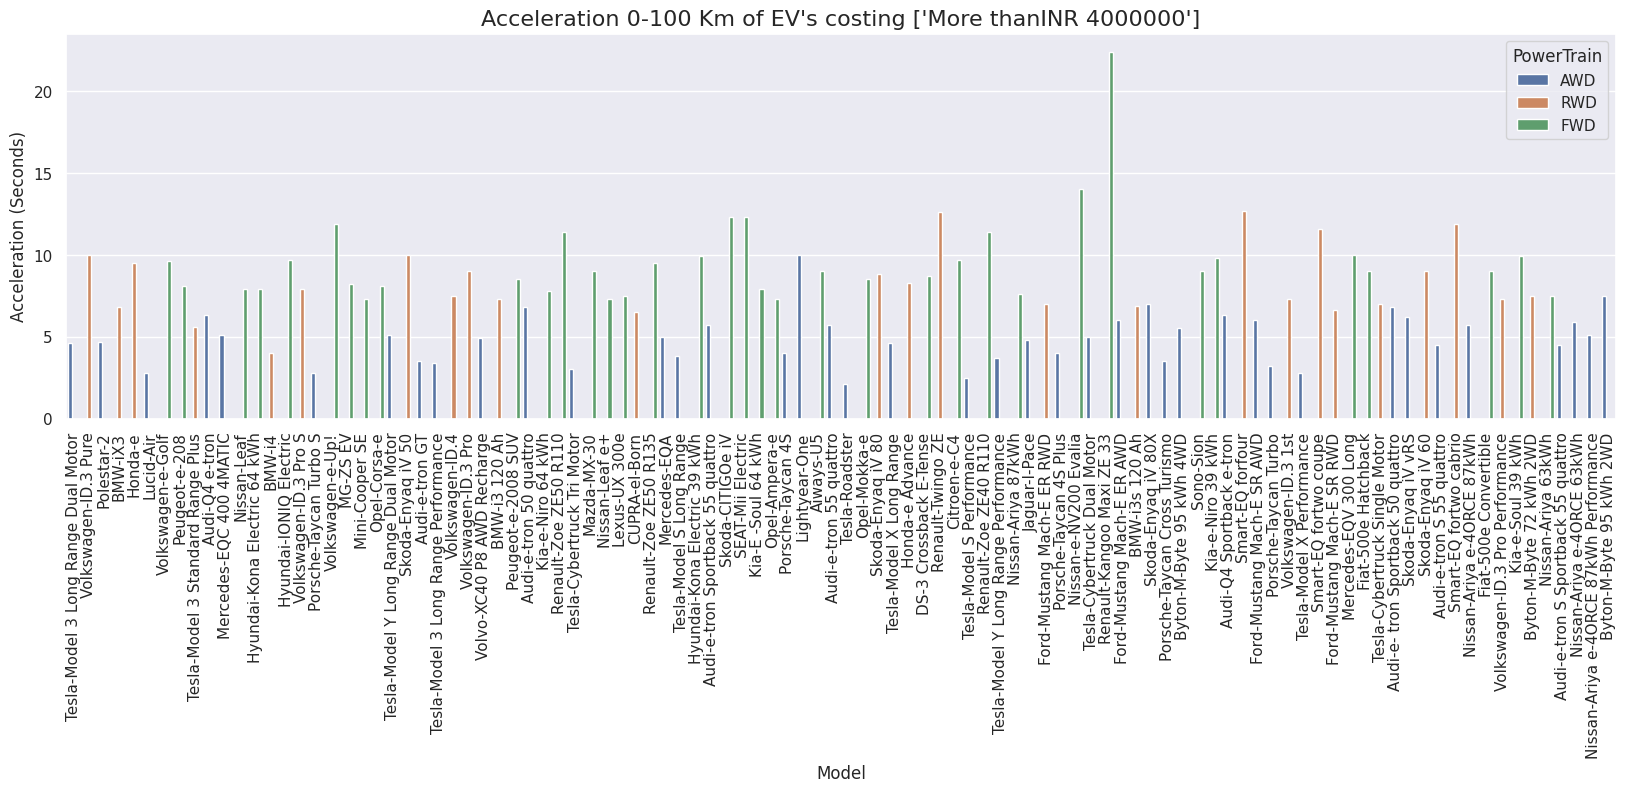

In [12]:
#Accelaration(0-100km/hr)
def acc(dataframe, text):
    plt.figure(figsize=(20,5))
    sbn.set_theme(style="darkgrid")
    sbn.barplot(x = 'CarName', y = 'AccelSec', data=df, hue=df['PowerTrain'])
    plt.title('''Acceleration 0-100 Km of EV's costing {}'''.format(text), fontsize=16)
    plt.ylabel('Acceleration (Seconds)')
    plt.xlabel('Model')
    plt.xticks(rotation = 90)
    plt.show()
    
acc(df_1, t1)
acc(df_2, t2)  

### Fast Charging Vehicles

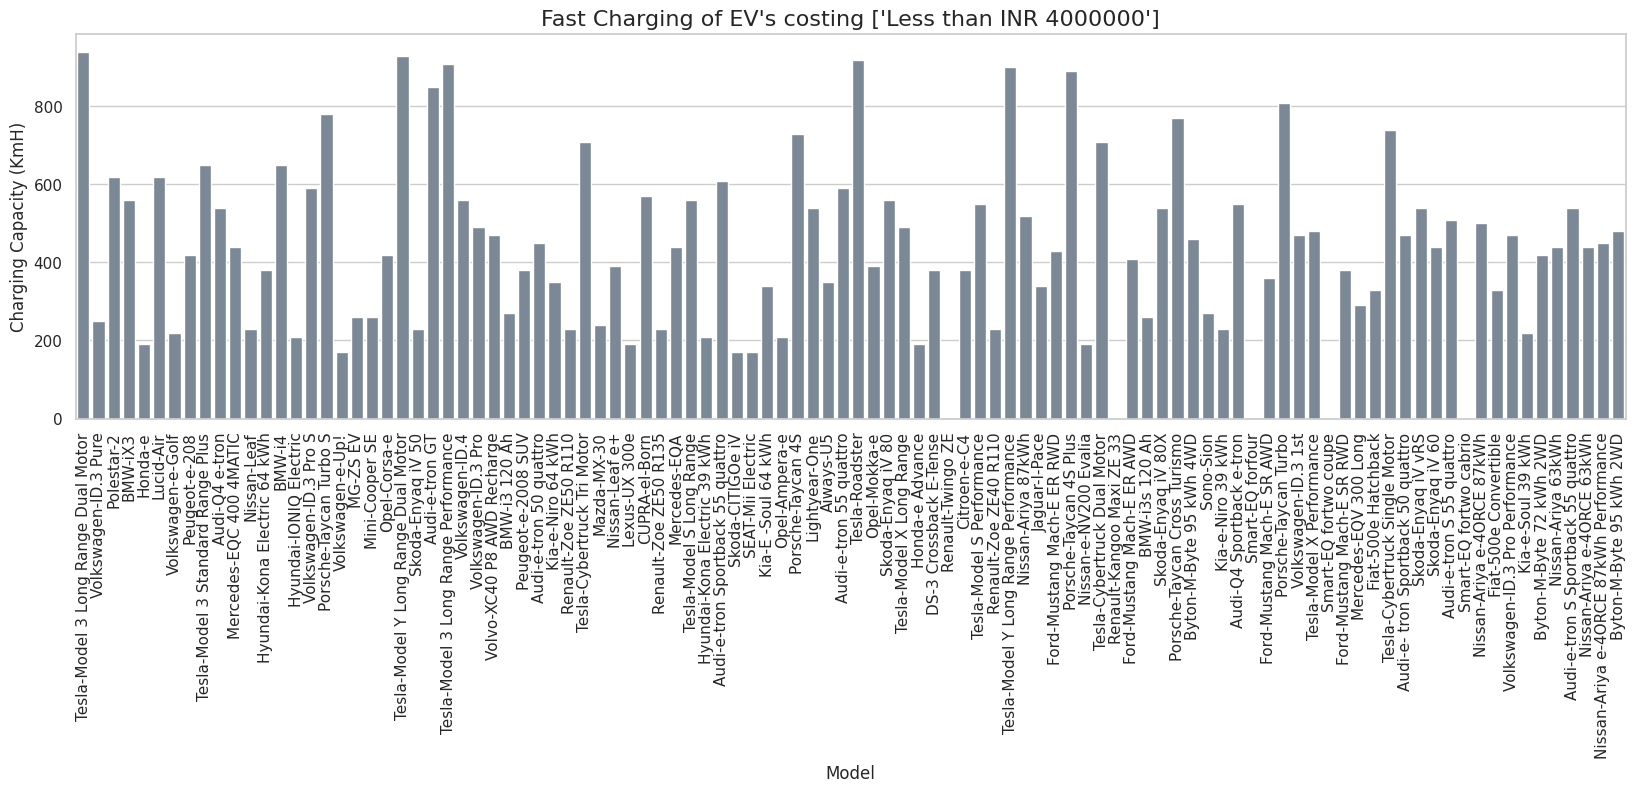

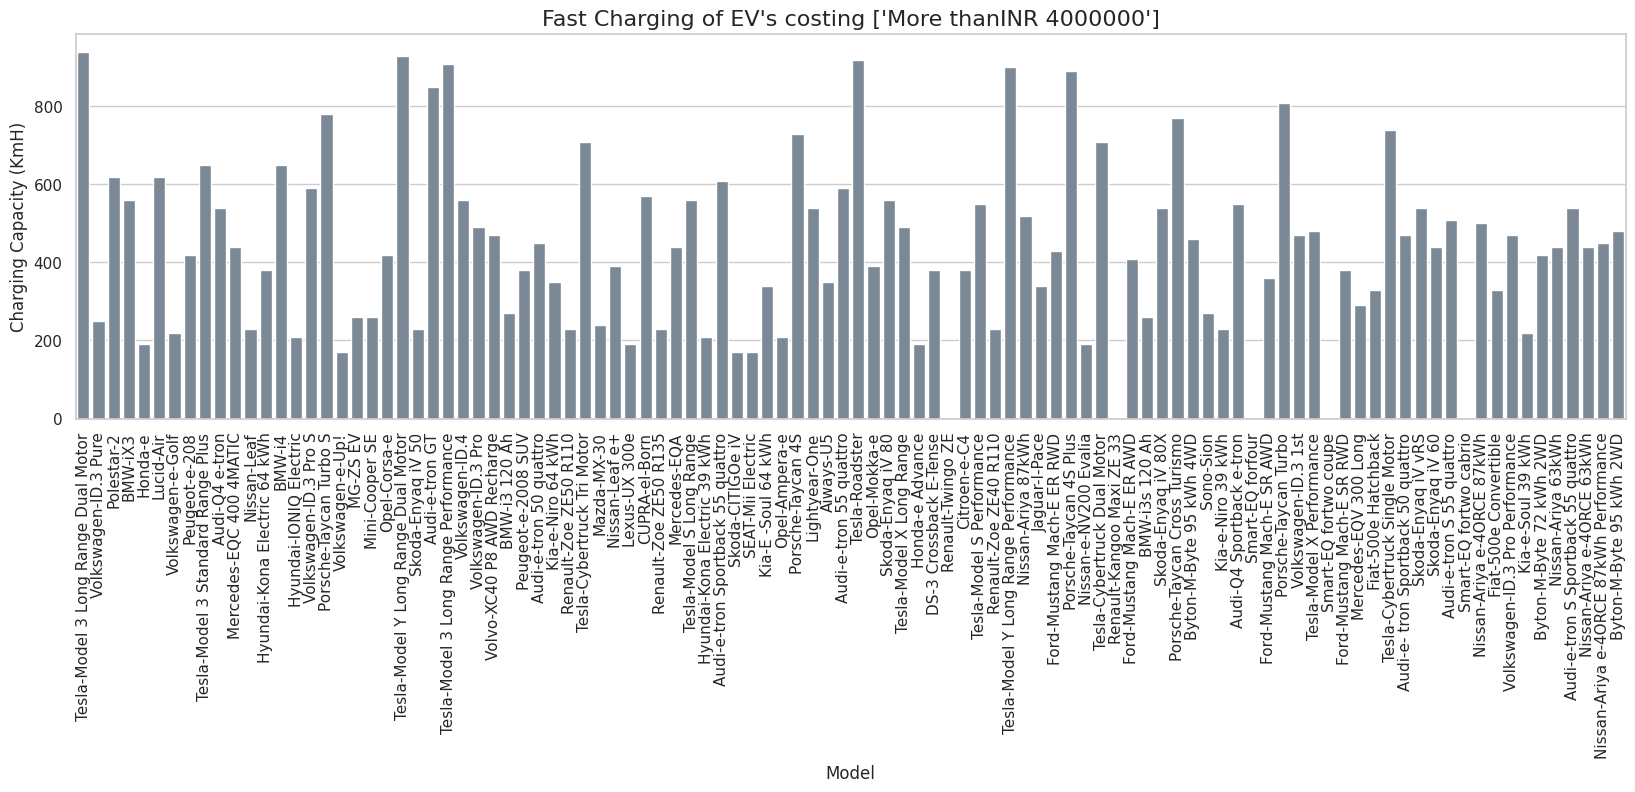

In [13]:
# Fast Charging data
def fastcharge(dataframe, price):
    plt.figure(figsize=(20, 5))
    sbn.set_theme(style="whitegrid")
    sbn.barplot(x='CarName', y='FastCharge_KmH', data=df, color = 'lightslategrey')
    plt.title('''Fast Charging of EV's costing {}'''.format(price), fontsize = 16)
    plt.ylabel('Charging Capacity (KmH)')
    plt.xlabel('Model')
    plt.xticks(rotation=90)
    plt.show()
    
fastcharge(df_1, t1)    
fastcharge(df_2, t2)    

## Basic  Analysis

### Vehicles to buy under INR 40,00000 with max range(Km)

In [14]:
pd.set_option('display.max_columns', None)
top_range_1 = df_1.sort_values(by= 'Range_Km', ascending= False)
top_range_1[['CarName', 'Range_Km', 'Battery_Pack Kwh', 'INR', 'RapidCharge']]

,CarName,Range_Km,Battery_Pack Kwh,INR,RapidCharge
15,Volkswagen-ID.3 Pro S,440,77.0,3350574.758,Yes
37,CUPRA-el-Born,425,77.0,3683209.500,Yes
53,Skoda-Enyaq iV 80,420,77.0,3273964.000,Yes
25,Volkswagen-ID.4,420,77.0,3683209.500,Yes
88,Skoda-Enyaq iV vRS,400,77.0,3887832.250,Yes
12,Hyundai-Kona Electric 64 kWh,400,64.0,3339034.035,Yes
71,Skoda-Enyaq iV 80X,400,77.0,3683209.500,Yes
86,Tesla-Cybertruck Single Motor,390,100.0,3683209.500,Yes
31,Kia-e-Niro 64 kWh,370,64.0,3118859.956,Yes
45,Kia-E -Soul 64 kWh,365,64.0,3015075.297,Yes


### Vehicles with best Acceleration under INR 40,00000

In [15]:
pd.set_option('display.max_columns', None)
acceleration_1 = df_1.sort_values(by= 'AccelSec')
acceleration_1[['CarName', 'AccelSec', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']]

,CarName,AccelSec,Range_Km,PowerTrain,Battery_Pack Kwh,INR
39,Mercedes-EQA,5.0,350,AWD,66.5,3683209.500
8,Tesla-Model 3 Standard Range Plus,5.6,310,RWD,50.0,3796161.258
88,Skoda-Enyaq iV vRS,6.2,400,AWD,77.0,3887832.250
37,CUPRA-el-Born,6.5,425,RWD,77.0,3683209.500
83,Ford-Mustang Mach-E SR RWD,6.6,360,RWD,88.0,3838722.790
70,BMW-i3s 120 Ah,6.9,230,RWD,37.9,3398865.727
86,Tesla-Cybertruck Single Motor,7.0,390,RWD,100.0,3683209.500
71,Skoda-Enyaq iV 80X,7.0,400,AWD,77.0,3683209.500
35,Nissan-Leaf e+,7.3,325,FWD,56.0,3047814.937
19,Mini-Cooper SE,7.3,185,FWD,28.9,2593061.337


### Vehicles with Maximum Efficiency

In [16]:
pd.set_option('display.max_columns', None)
efficiency = df.sort_values(by = 'Efficiency_WhKm')
efficiency[['CarName', 'Efficiency_WhKm', 'Range_Km', 'PowerTrain', 'Battery_Pack Kwh', 'INR']]

,CarName,Efficiency_WhKm,Range_Km,PowerTrain,Battery_Pack Kwh,INR
48,Lightyear-One,104,575,AWD,60.0,1.219552e+07
14,Hyundai-IONIQ Electric,153,250,FWD,38.3,2.820438e+06
8,Tesla-Model 3 Standard Range Plus,153,310,RWD,50.0,3.796161e+06
41,Hyundai-Kona Electric 39 kWh,154,255,FWD,39.0,2.780496e+06
74,Sono-Sion,156,225,FWD,35.0,2.087152e+06
...,...,...,...,...,...,...
98,Audi-e-tron S Sportback 55 quattro,258,335,AWD,86.5,7.861606e+06
67,Tesla-Cybertruck Dual Motor,261,460,AWD,120.0,4.501700e+06
33,Tesla-Cybertruck Tri Motor,267,750,AWD,200.0,6.138682e+06
90,Audi-e-tron S 55 quattro,270,320,AWD,86.5,7.677446e+06


### Budget wise EV Car Analysis

In [17]:
df1=pd.read_csv("/kaggle/input/ev-india-market/EVIndia.csv")
PriceRange = (df1['PriceRange'].astype(str))
df1.head(20)

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,939950,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,1306500,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,1306500,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,2393500,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,2388500,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,10900000,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,18000000,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,2915000,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,10000000,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,11600000,5 Seater,na,na,na


In [18]:
df1.isnull().sum()

Car             0
Style           0
Range           0
Transmission    0
VehicleType     0
PriceRange      0
Capacity        0
BootSpace       0
BaseModel       0
TopModel        0
dtype: int64

In [19]:
df1['PriceRange']

0       939950
1      1306500
2      1306500
3      2393500
4      2388500
5     10900000
6     18000000
7      2915000
8     10000000
9     11600000
10    15000000
11    11000000
Name: PriceRange, dtype: int64

In [20]:
# this will replace "Boston Celtics" with "Omega Warrior"
df1 = df1.replace(to_replace="₹",value=" ")
df1

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,939950,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,1306500,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,1306500,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,2393500,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,2388500,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,10900000,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,18000000,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,2915000,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,10000000,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,11600000,5 Seater,na,na,na


In [21]:
mid_range_cars= df1.loc[df1['PriceRange'] <=3000000]
high_range_cars= df1.loc[df1['PriceRange'] >3000000]
s1 = ['Less than INR 3000000']
s2 = ['More than INR 3000000']

In [22]:
mid_range_cars

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,939950,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,1306500,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,1306500,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,2393500,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,2388500,5 Seater,na,Premium Dual Tone,HSE
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,2915000,5 Seater,580 L,STD,na


In [23]:
high_range_cars

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,10900000,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,18000000,5 Seater,405 L,Quattro,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,10000000,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,11600000,5 Seater,na,na,na
10,Porsche Taycan,Premium Sports Sedan,na,Automatic,Electric,15000000,4 Seater,na,na,na
11,Audi E-Tron,Compact SUV,400 Km/Full Charge,Automatic,Electric,11000000,5 Seater,660 L,na,na


#### mid-range vehicles with max range

In [26]:
pd.set_option('display.max_columns', None)
max_range = mid_range_cars.sort_values(by= 'Range')
max_range[['Car', 'Style', 'Range', 'PriceRange', 'BootSpace']]

,Car,Style,Range,PriceRange,BootSpace
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,1306500,316 L
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,939950,350 L
7,BYD E6,Subcompact MPV,415 Km/Full Charge,2915000,580 L
3,MG ZS EV,Compact SUV,419 Km/Full Charge,2393500,448 L
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,1306500,350 L
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,2388500,na


#### Visualizing Price - Range 

/tmp/ipykernel_33/4044561395.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  a_1.set_xticklabels(mid_range_cars['Car'], rotation = 'vertical')


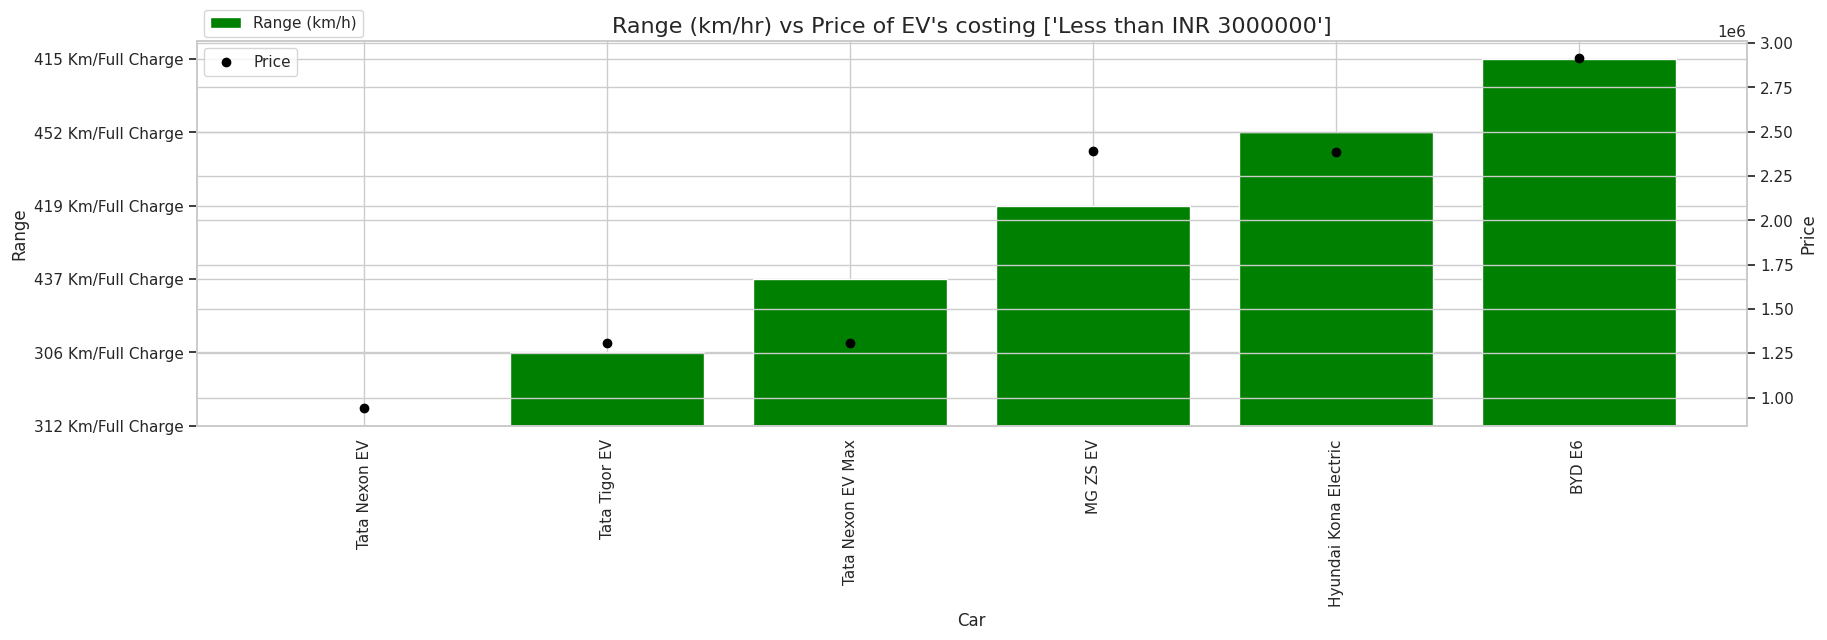

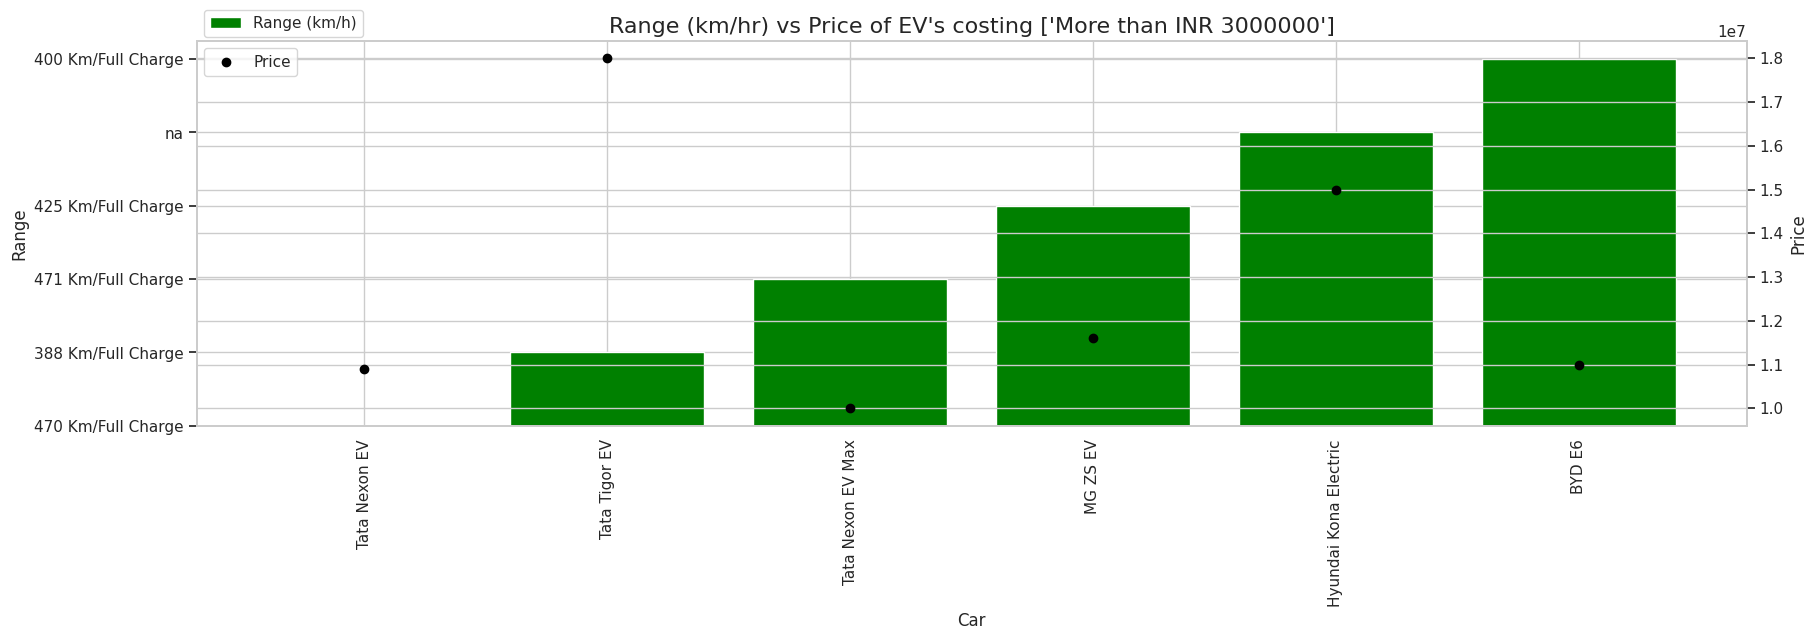

In [27]:
def pricerange(dataframe, text):
    plt.figure(figsize=(20,5))
    a_1 = plt.subplot()
    a_1.bar(dataframe['Car'], dataframe['Range'], label='Range (km/h)', color='green')
    plt.legend(loc = 'upper left', bbox_to_anchor = (0,1.1))
    a_2 = a_1.twinx()
    a_2.scatter(dataframe['Car'], dataframe['PriceRange'], label = 'Price', color='black')
    plt.title('''Range (km/hr) vs Price of EV's costing {}'''.format(text), fontsize = 16)
    a_1.set_xlabel('Car')
    a_1.set_ylabel('Range')
    a_2.set_ylabel('Price')
    plt.legend(loc= 'upper left', bbox_to_anchor = (0,1))
    a_1.set_xticklabels(mid_range_cars['Car'], rotation = 'vertical')
    plt.show()
    
pricerange(mid_range_cars,s1)
pricerange(high_range_cars,s2)

In [68]:
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [69]:
data=pd.read_csv("/kaggle/input/ev-india-market/pollution data.csv")
data

,state,status,AQI-US,PM2.5,PM10,Temp,Humid
0,Andhra Pradesh,MODERATE,56,16,31,28,74
1,Arunachal Pradesh,GOOD,39,11,17,21,100
2,Assam,GOOD,46,13,20,23,98
3,Bihar,MODERATE,87,28,53,31,58
4,Chandigarh,POOR,107,38,49,25,53
5,Chhattisgarh,MODERATE,67,20,46,27,72
6,Dadra And Nagar Haveli,MODERATE,62,16,35,27,82
7,Daman And Diu,MODERATE,61,16,33,28,79
8,Delhi,POOR,108,37,113,29,58
9,Goa,GOOD,30,8,20,27,81


<Axes: xlabel='Temp', ylabel='state'>

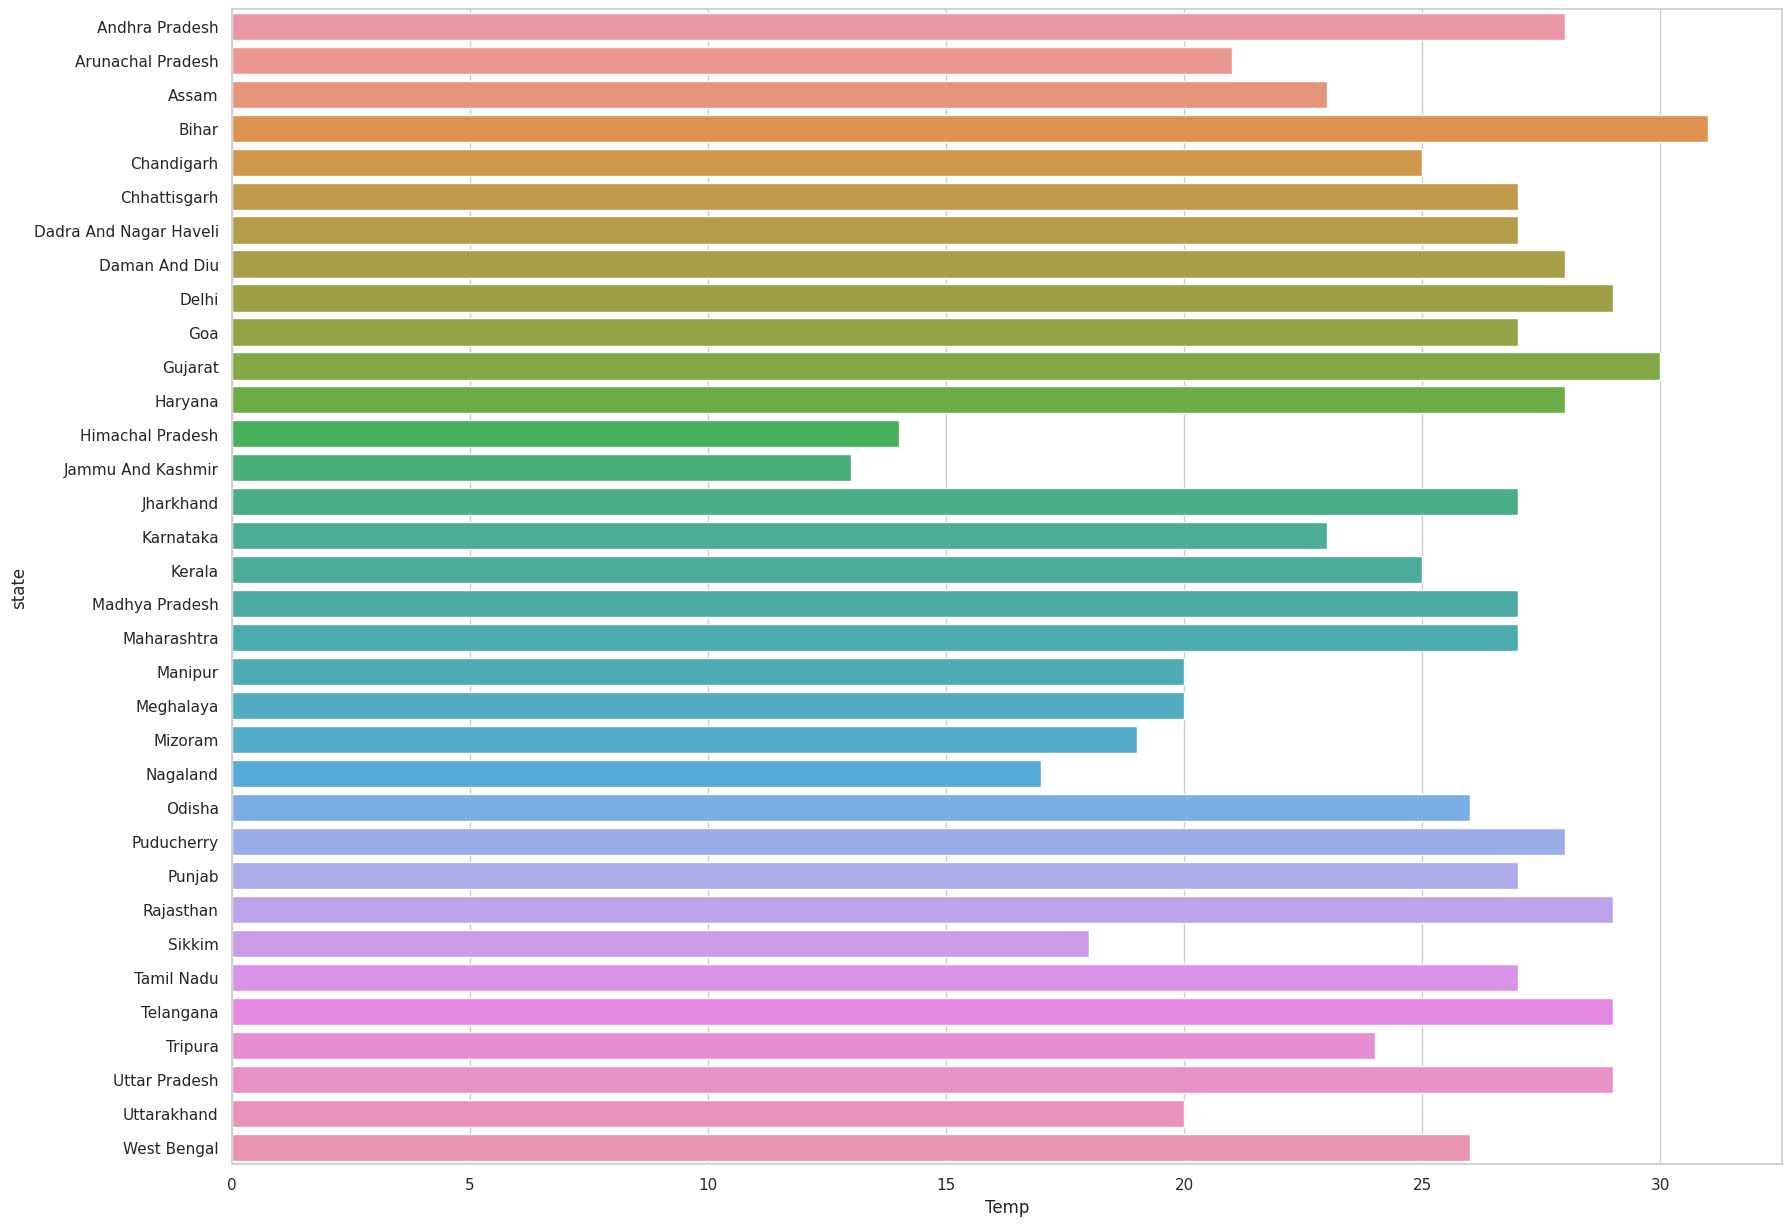

In [75]:
plt.figure(figsize=(20,15))
sns.barplot(x = "Temp",y = "state",data=data)

In [77]:
dataframe = pd.read_csv("/kaggle/input/states/states_data_car.csv")
dataframe

,state,capital,subsidy,road tax,petrol,diesel
0,Andhra Pradesh,Amaravati,0.0,1.00,111.65,99.41
1,Arunachal Pradesh,Itanagar,5000.0,0.00,95.89,84.81
2,Assam,Dispur,10000.0,1.00,96.34,84.24
3,Bihar,Patna,10000.0,1.00,109.17,95.82
4,Chhattisgarh,Raipur,5000.0,0.00,102.98,95.96
5,Goa,Panaji,8000.0,1.00,97.82,90.37
6,Gujarat,Gandhinagar,10000.0,0.50,96.49,92.23
7,Haryana,Chandigarh,0.0,0.00,97.24,90.08
8,Himachal Pradesh,Shimla,5000.0,0.00,95.74,81.99
9,Jharkhand,Ranchi,5000.0,0.00,100.09,94.88


In [78]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     36 non-null     object 
 1   capital   36 non-null     object 
 2   subsidy   36 non-null     float64
 3   road tax  36 non-null     float64
 4   petrol    36 non-null     float64
 5   diesel    36 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.8+ KB


In [79]:
dataframe.isnull().sum()

state       0
capital     0
subsidy     0
road tax    0
petrol      0
diesel      0
dtype: int64

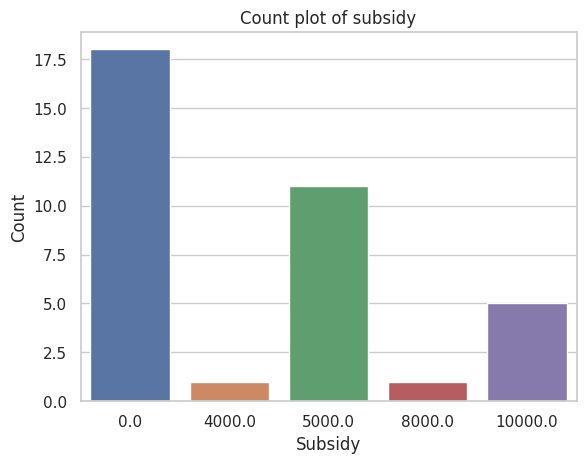

In [80]:
sns.countplot(x=dataframe["subsidy"])
plt.title('Count plot of subsidy')
plt.xlabel('Subsidy')
plt.ylabel('Count')
plt.show()

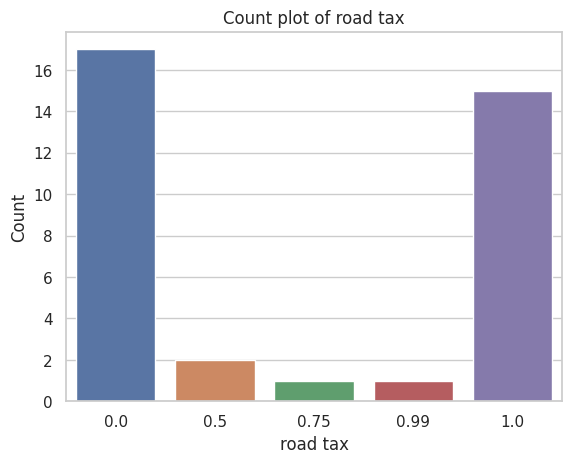

In [81]:
sns.countplot(x=dataframe["road tax"])
plt.title('Count plot of road tax')
plt.xlabel('road tax')
plt.ylabel('Count')
plt.show()

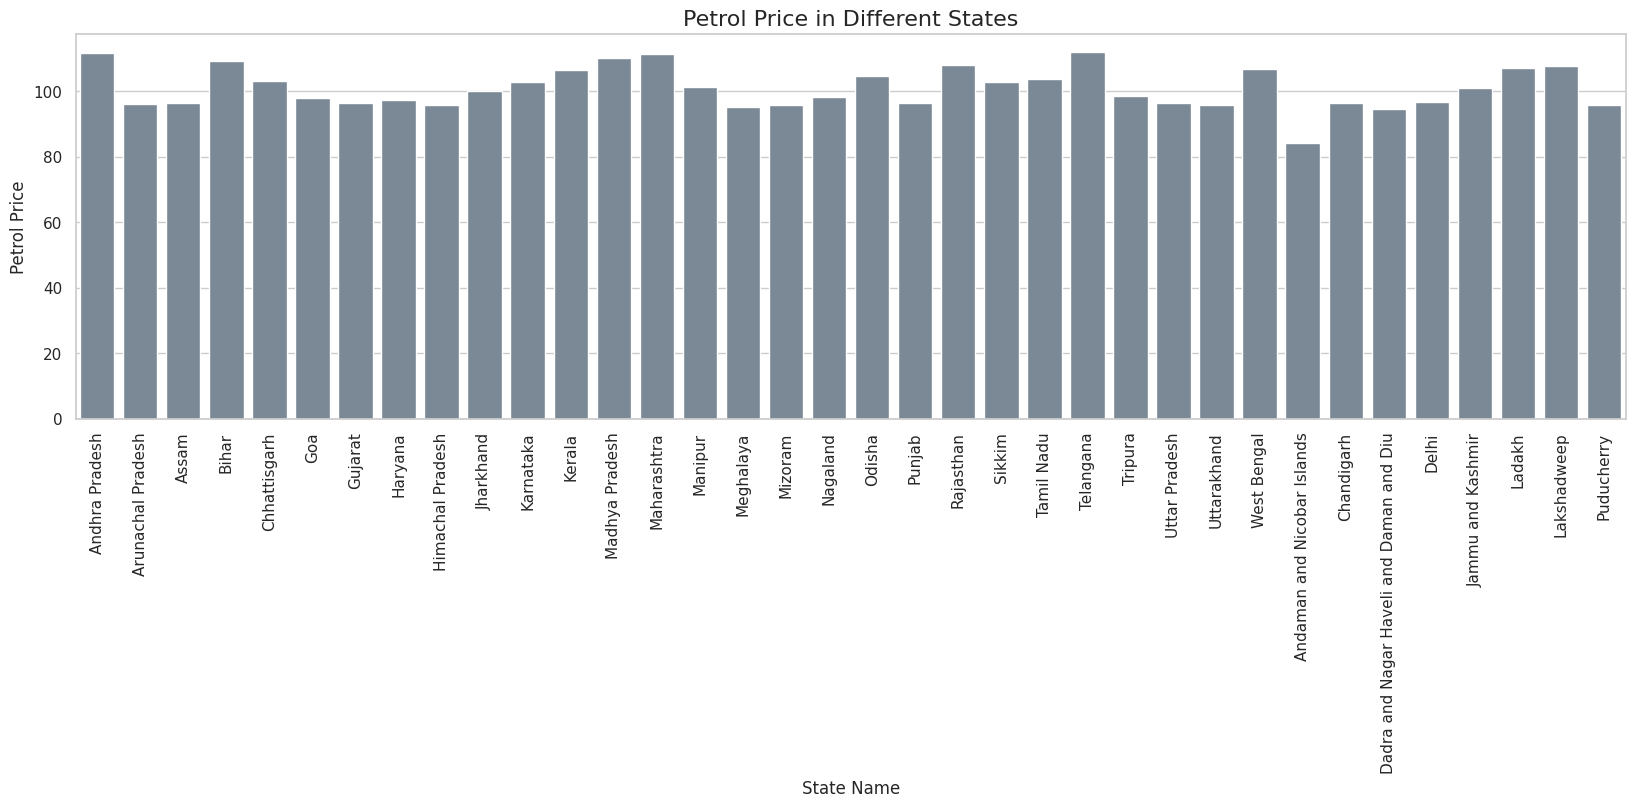

In [83]:
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'state',y = 'petrol', data=dataframe, color = 'lightslategrey')
plt.title('Petrol Price in Different States' , fontsize = 16)
plt.ylabel('Petrol Price')
plt.xlabel('State Name')
plt.xticks(rotation=90)
plt.show()

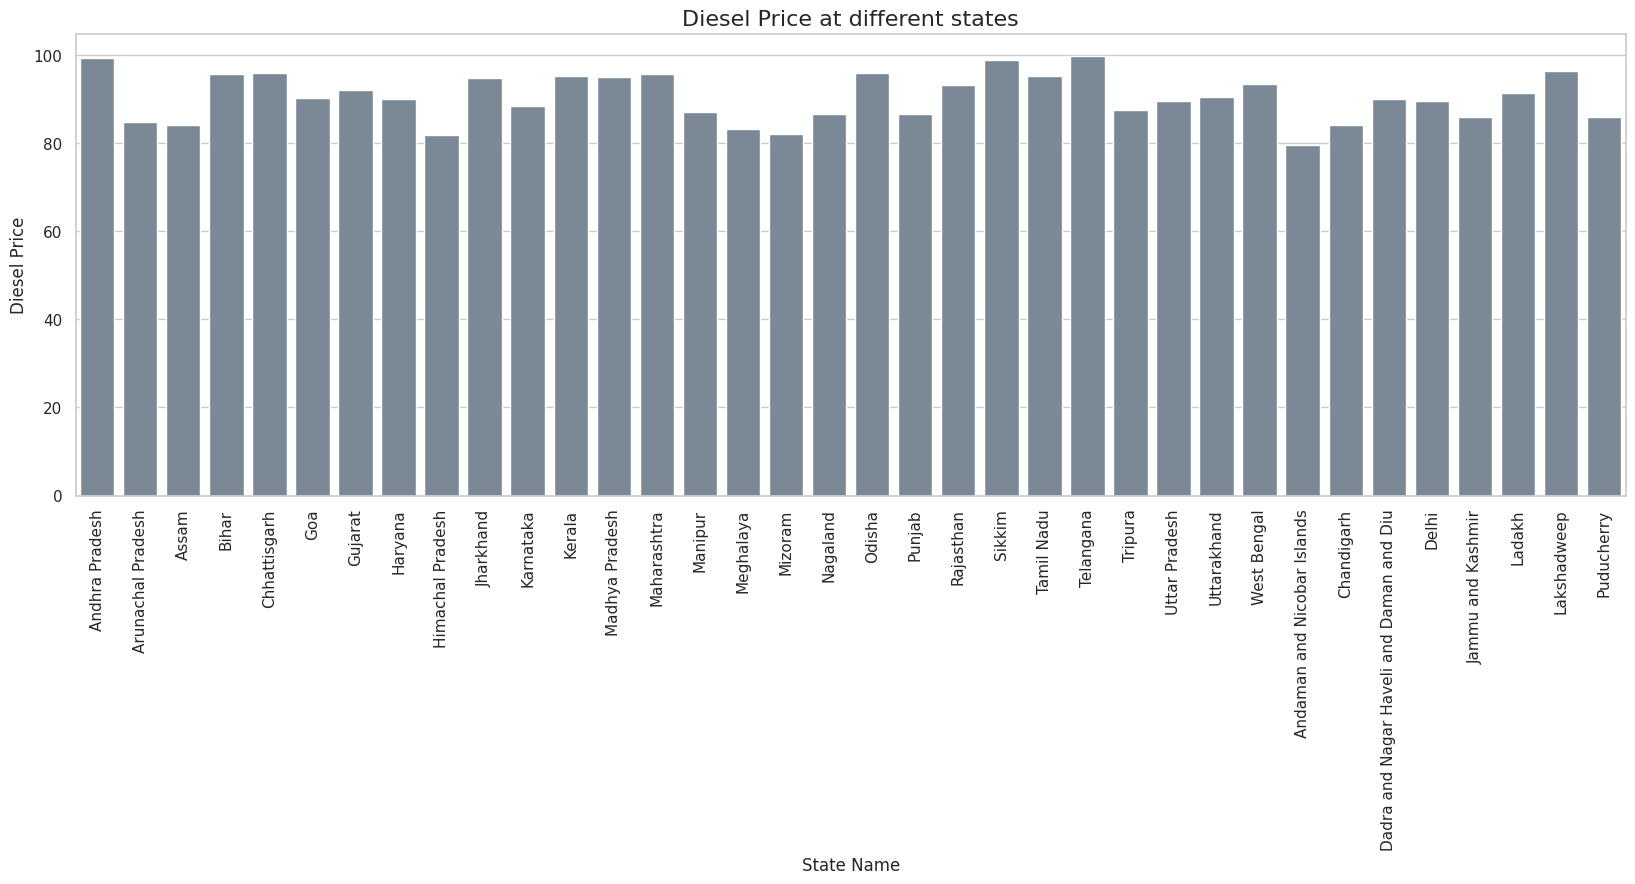

In [84]:
plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid")
sns.barplot(x = 'state', y = 'diesel', data=dataframe, color = 'lightslategrey')
plt.title('Diesel Price at different states' , fontsize = 16)
plt.ylabel('Diesel Price')
plt.xlabel('State Name')
plt.xticks(rotation=90)
plt.show()